<a href="https://colab.research.google.com/github/Ivacn/globalai-project/blob/main/Py2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing the Libraries***

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
from scipy import stats


# ***Loading for the Data***

In [4]:
df=pd.read_csv('/content/NetflixOriginals.csv',encoding = 'ISO-8859-1')

# ***13-Hangi yılın toplam "runtime" süresi en fazladır?***

---
# ***Which year has the most total "runtime" time?***


Bunun için öncelikle yıl değişkenimizi sayısal bir formata çevirmemiz gerekiyor. Ve bundan sonra, yöntemin içindeki yıl değişkenini almamız gerekiyor. Ve son olarak, çalışma zamanı değişkenlerimizi gruplamamız gerekiyor.

---
For this, firstly we need to change our year variable to a numerical format. And after that, we need to take the year variable inside of the method. And, lastly, we need to group our runtime variables.


In [5]:
df2=df.groupby([pd.to_datetime(df['Premiere']).dt.year]).sum().sort_values(["Runtime"],ascending=False)
df2["Runtime"]

Premiere
2020    17384
2019    10856
2018     9405
2021     7214
2017     6129
2016     2766
2015      814
2014       81
Name: Runtime, dtype: int64

# ***14-Her bir dilin en fazla kullanıldığı "Genre" nedir?7***

---


# ***What is the "Genre" in which each language is used the most?***

Her bir dilin kullandığı genre'yi öğrenmek için "groupby" metodu ile çalışmalıyız.

---

In order to learn the genre used by each language, we should work with the "groupby" method.

In [6]:
df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

# ***Veri setinde outlier veri var mıdır? Açıklayınız.***

---
# ***Is there outlier data in the dataset? Please explain.***


Veri setinin doğru bir şekilde yüklendiğini anlamak için ilk ve son 5 satırını head() ve tail() fonksiyonları ile görüntülemeliyiz.

---

In order to understand that the data set is loaded correctly, we need to display the first and last 5 lines with the head() and tail() functions.

In [24]:
df.head()
df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


Değişkenlere dair daha fazla bilgi edinmek için info() fonksiyonunu kullanarız.

---

To find out more about the variables, we use the info() function.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Kutu grafiğini çizmek için Matplotlib (kısaca plt) kütüphanesini kullanmalıyız.Bu çerçevenin 2 adet iç grafik içermesini istediğimiz ve 1 satır, 2 sütun şeklinde yan yana görüntülenmesini istediğimiz için subplots’a 1, 2 parametrelerini veriyoruz.Kutu grafiklerinin daha açıklayıcı olması için “set_title” ile de her kutu grafiğine başlık atıyoruz.

---
To plot the box graph, we should use the Matplotlib (plt for short) library.Since we want this frame to contain 2 internal graphs and we want it to be displayed side by side in the form of 1 row, 2 columns, we give subplots the parameters 1, 2.In order for the box graphs to be more descriptive, we also assign a title to each box graph with “set_title”.


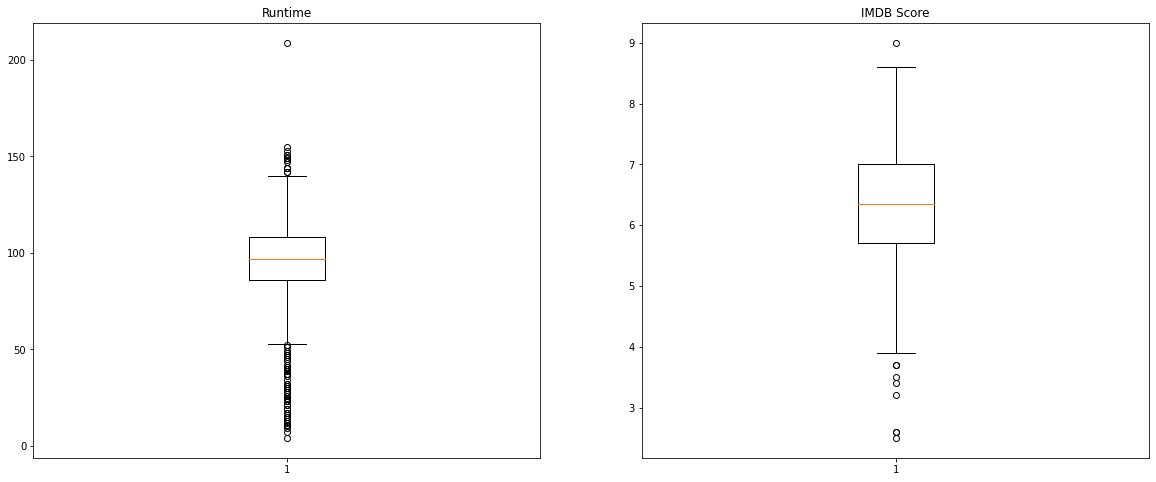

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.boxplot(df["Runtime"])
ax1.set_title("Runtime")
 
ax2.boxplot(df["IMDB Score"])
ax2.set_title("IMDB Score")
 
plt.show()


Kutu grafiğinde olduğu gibi aynı yolu izlemeliyiz. Önce çerçeve ve iç grafik yapısını belirlemek gerekir Ardından “hist” fonksiyonu ile 2 farklı değişkenimiz için histogram grafiklerini çizdirmiş olduk.

---
We need to follow the same path as in the box graph. First, it is necessary to determine the frame and internal graph structure, and then we have drawn histogram graphs for our 2 different variables with the “hist” function.


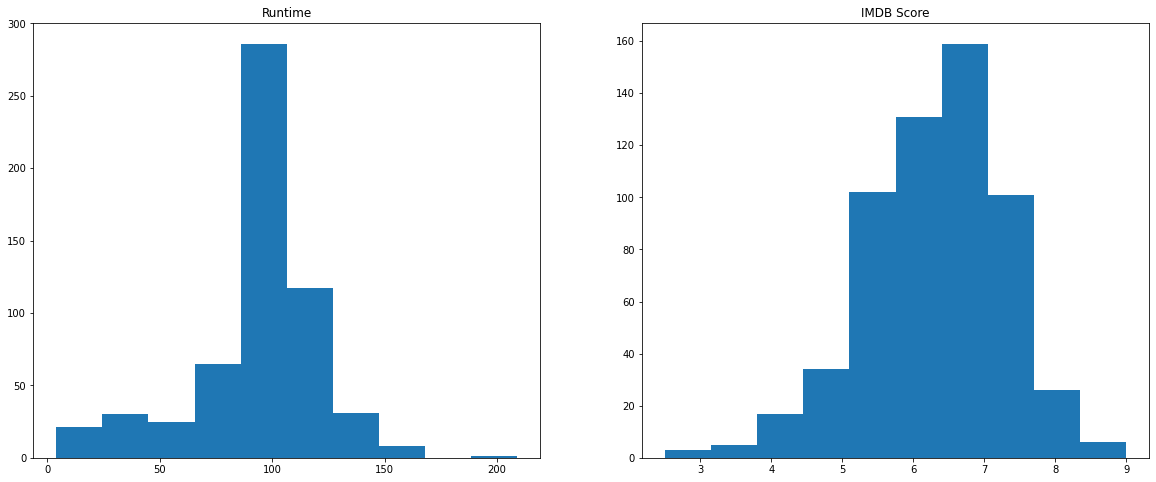

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.hist(df["Runtime"])
ax1.set_title("Runtime")
 
ax2.hist(df["IMDB Score"])
ax2.set_title("IMDB Score")

plt.show()

Çeyrekler açıklığını  SciPy kütüphanesinin “iqr()” fonksiyonu ile hesaplayabiliriz.Fonksiyona iqr adını verdik. df ve var adında iki parametre ile çalışmaktadır.Aykırı değerleri belirleyecek sınırlar olan alt ve üst eşik değerlerini hesaplarken 1. çeyrekten 1.5 kat az, 3. çeyrekten de 1.5 kat fazla olan değeri sınır olarak belirledik.Son olarak da işlem yapılan değişkendeki eşik değerlerin altında ve üstünde kalan değerleri filtreleme işlemi yaptık.

---
We can calculate the quadrant clearance using the “iqr()” function of the SciPy library.We have named the function iqr. it works with two parameters called df and var.1. When calculating the lower and upper threshold values, which are the limits that will determine the outliers. 1.5 times less than a quarter, 3. we have set the value as the limit, which is 1.5 times more than a quarter.Finally, we have filtered the values that remain below and above the threshold values in the variable being processed.


In [36]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q2 = np.quantile(df[var], 0.75)
    diff = q2 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q2 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]


Fonksiyonu çalıştırdığımızda, belirlediğimiz kurala göre aykırı olarak bulunan değerleri birer değişkene atadık. Ve aykırı değerlerin 75 ile 9 olduğunu tespit ettik.


---


When we ran the function, we assigned the values that were found to be contrary to the rule we set to a variable. And we found that the outliers are 75 to 9.

In [38]:
runtime_out = iqr(df, "Runtime")
imdb_out = iqr(df, "IMDB Score")
print(len(runtime_out), len(imdb_out))
 

75 9
